# 1. Import the Necessary Package

In [1]:
import gym
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from recordtype import *
import copy
import matplotlib.pyplot as plt
from utils import * # mean_val, logger
%matplotlib inline

# 2. Instantiate the Environment 

In [2]:
from ff_env_discrete_dqn_her_i import FFEnv, Viewer  # Environemnt

env = FFEnv()
print("State size :", env.state_size)
print("Action size : ", env.action_size)

State size : 7
Action size :  5


# 3. Instantiate the Agent

In [3]:
from dqn_her_agent import Agent, HER

agent = Agent(state_size=env.state_size, action_size=env.action_size, seed=0)
her = HER()

# 4. Train the Agent with DQN

In [4]:
def dqn(num_episodes=10000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    log = logger()
    log.add_log('scores')
    log.add_log('avg_loss')
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    for i_episode in range(1, num_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done = env.step(action)
            # Add experience tuples to replay buffer and learn
            agent.step(state, action, reward, next_state, done)
            # Add experience tuples to her buffer
            her.append(state, action, reward, next_state, done)
            
            state = next_state
            score += reward
            if done:
                break 
        
        # Update her 
        if (len(her.buffer) != 0):
            her_buffer = her.update()
            # Transfer experiences from her buffer to replay buffer
            for i in range(len(her_buffer)):
                agent.buffer.memory.append(her_buffer[i])
        her.buffer = deque()
        
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        log.add_item('scores', score)
        log.add_item('avg_loss', agent.mean_loss.get())
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'part-i.pth')
        if i_episode >= num_episodes:
            torch.save(agent.qnetwork_local.state_dict(), 'part-i.pth')
            break
            
    return scores, log

scores, log = dqn()

Episode 100	Average Score: -304.79
Episode 200	Average Score: -251.68
Episode 300	Average Score: -221.94
Episode 400	Average Score: -235.24
Episode 500	Average Score: -225.32
Episode 600	Average Score: -209.51
Episode 700	Average Score: -245.85
Episode 800	Average Score: -209.33
Episode 900	Average Score: -236.95
Episode 1000	Average Score: -221.82
Episode 1100	Average Score: -236.78
Episode 1200	Average Score: -219.01
Episode 1300	Average Score: -200.18
Episode 1400	Average Score: -202.21
Episode 1500	Average Score: -178.72
Episode 1600	Average Score: -219.46
Episode 1700	Average Score: -197.30
Episode 1800	Average Score: -208.36
Episode 1900	Average Score: -217.43
Episode 2000	Average Score: -213.01
Episode 2100	Average Score: -210.61
Episode 2200	Average Score: -224.29
Episode 2300	Average Score: -204.19
Episode 2400	Average Score: -236.04
Episode 2500	Average Score: -216.79
Episode 2600	Average Score: -240.22
Episode 2700	Average Score: -232.42
Episode 2800	Average Score: -209.66
E

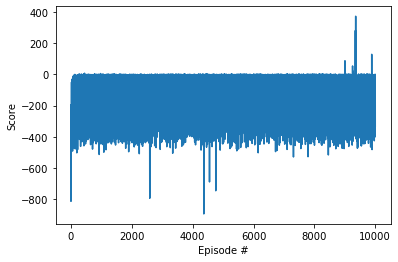

In [5]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Text(0, 0.5, 'average loss')

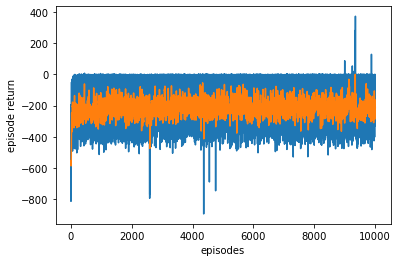

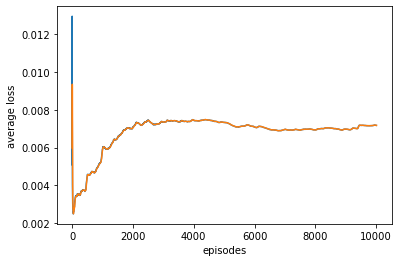

In [6]:
# Plotting 
Y = np.asarray(log.get_log('scores'))
Y2 = smooth(Y)
x = np.linspace(0, len(Y), len(Y))
fig1 = plt.figure()
ax1 = plt.axes()
ax1.plot(x, Y, Y2)
plt.xlabel('episodes')
plt.ylabel('episode return')

Y = np.asarray(log.get_log('avg_loss'))
Y2 = smooth(Y)
x = np.linspace(0, len(Y), len(Y))
fig2 = plt.figure()
ax2 = plt.axes()
ax2.plot(x, Y, Y2)
plt.xlabel('episodes')
plt.ylabel('average loss')

# 5. Evaluate

In [1]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('part-i.pth', map_location='cpu'))
import time

for i in range(10):
    state = env.reset()
    print()
    for j in range(200):
        action = agent.act(state)
        env.render()
        state, reward, done = env.step(action)
        time.sleep(0.005)
        if done:
            print('------------')
            break 
path_x, path_y = env.viewer.return_path()      

#env.close()

NameError: name 'agent' is not defined

In [1]:
plt.scatter(path_x, path_y)
plt.show()

NameError: name 'plt' is not defined

In [9]:
# Check HER Output and input

In [10]:
agent.buffer.memory = deque(maxlen=int(1e5))
her.buffer = deque()

In [11]:
num_episodes=1
max_t=1000
eps_start=1.0
eps_end=0.01
eps_decay=0.995
eps = eps_start

In [12]:
state = env.reset()
for t in range(5): 
    action = agent.act(state, eps)
    print("a : ", action)
    next_state, reward, done = env.step(action)
    print("state : ", state)
    print("next_state : ", next_state)
    print("reward : ", reward)
    print("done : ", done)
    # Add experience tuples to replay buffer and learn
    agent.step(state, action, reward, next_state, done)
    # Add experience tuples to her buffer
    her.append(state, action, reward, next_state, done)
    
    state = next_state
    if done:
        break

    print('------------')

a :  2
state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.72316939 0.91556494
 0.        ]
next_state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.72316939 0.91556494
 0.        ]
reward :  -0.3493798460283377
done :  False
------------
a :  0
state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.72316939 0.91556494
 0.        ]
next_state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.72316939 0.91556494
 0.        ]
reward :  -0.3493798460283377
done :  False
------------
a :  3
state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.72316939 0.91556494
 0.        ]
next_state :  [1.57214236 1.37674272 1.38003446 0.90331274 1.72316939 0.91556494
 0.        ]
reward :  -0.3433536043245882
done :  False
------------
a :  0
state :  [1.57214236 1.37674272 1.38003446 0.90331274 1.72316939 0.91556494
 0.        ]
next_state :  [1.57214236 1.37674272 1.38003446 0.90331274 1.72316939 0.91556494
 0.        ]
reward :  -0.3433536043245882
done :  False
------------
a :  2
state

In [13]:
for i in agent.buffer.memory:
    print("state : ", i.state)
    print("next_state : ", i.next_state)
    print("reward : ", i.reward)
    print("done : ", i.done)
    print('--------')

state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.72316939 0.91556494
 0.        ]
next_state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.72316939 0.91556494
 0.        ]
reward :  -0.3493798460283377
done :  False
--------
state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.72316939 0.91556494
 0.        ]
next_state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.72316939 0.91556494
 0.        ]
reward :  -0.3493798460283377
done :  False
--------
state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.72316939 0.91556494
 0.        ]
next_state :  [1.57214236 1.37674272 1.38003446 0.90331274 1.72316939 0.91556494
 0.        ]
reward :  -0.3433536043245882
done :  False
--------
state :  [1.57214236 1.37674272 1.38003446 0.90331274 1.72316939 0.91556494
 0.        ]
next_state :  [1.57214236 1.37674272 1.38003446 0.90331274 1.72316939 0.91556494
 0.        ]
reward :  -0.3433536043245882
done :  False
--------
state :  [1.57214236 1.37674272 1.38003446 0.90331274 1.

In [14]:
for i in her.buffer:
    print("state : ", i.state)
    print("action : ", i.action)
    print("next_state : ", i.next_state)
    print("reward : ", i.reward)
    print("done : ", i.done)
    print('--------')


state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.72316939 0.91556494
 0.        ]
action :  2
next_state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.72316939 0.91556494
 0.        ]
reward :  -0.3493798460283377
done :  False
--------
state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.72316939 0.91556494
 0.        ]
action :  0
next_state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.72316939 0.91556494
 0.        ]
reward :  -0.3493798460283377
done :  False
--------
state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.72316939 0.91556494
 0.        ]
action :  3
next_state :  [1.57214236 1.37674272 1.38003446 0.90331274 1.72316939 0.91556494
 0.        ]
reward :  -0.3433536043245882
done :  False
--------
state :  [1.57214236 1.37674272 1.38003446 0.90331274 1.72316939 0.91556494
 0.        ]
action :  0
next_state :  [1.57214236 1.37674272 1.38003446 0.90331274 1.72316939 0.91556494
 0.        ]
reward :  -0.3433536043245882
done :  False
--------
state : 

In [15]:
her_buffer = her.update() 
for i in her_buffer:
    print("state : ", i.state)
    print("action : ", i.action)
    print("next_state : ", i.next_state)
    print("reward : ", i.reward)
    print("done : ", i.done)
    print('--------')

state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.38003446 0.90331274
 0.        ]
action :  2
next_state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.38003446 0.90331274
 0.        ]
reward :  -0.05957512263180358
done :  False
--------
state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.38003446 0.90331274
 0.        ]
action :  0
next_state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.38003446 0.90331274
 0.        ]
reward :  -0.05957512263180358
done :  False
--------
state :  [1.57079637 1.36674273 1.38124996 0.84375002 1.38003446 0.90331274
 0.        ]
action :  3
next_state :  [1.57214236 1.37674272 1.38003446 0.90331274 1.38003446 0.90331274
 0.        ]
reward :  -0.0
done :  True
--------
state :  [1.57214236 1.37674272 1.38003446 0.90331274 1.38003446 0.90331274
 0.        ]
action :  0
next_state :  [1.57214236 1.37674272 1.38003446 0.90331274 1.38003446 0.90331274
 0.        ]
reward :  -0.0
done :  True
--------
state :  [1.57214236 1.37674272 1.3800

In [16]:
her_buffer[0].next_state

array([1.57079637, 1.36674273, 1.38124996, 0.84375002, 1.38003446,
       0.90331274, 0.        ])